In [1]:
import contextily as ctx
import geopandas as gpd
import matplotlib.pyplot as plt
import rasterio
from rasterio.crs import CRS

In [2]:
df = gpd.read_file('chips.geojson')
df.head()

,CENTERX,CENTERY,STRATA,SAMPLE_ID,date,LS_Validat,random_id,geometry
0,-159.648125,69.21,3,3_38,2011-07-17,1,99,"POLYGON ((-159.89875 69.30000, -159.65900 69.3..."
1,-112.983750,67.05,4,4_27,2012-07-23,1,114,"POLYGON ((-113.21200 67.14000, -113.09850 67.1..."
2,17.698500,65.97,4,4_43,2010-07-24,1,20,"POLYGON ((17.61000 66.06000, 17.91700 66.06000..."
3,59.675000,65.79,3,3_1,2011-07-13,1,112,"POLYGON ((59.86900 65.88000, 59.89200 65.88000..."
4,-96.604375,62.73,4,4_34,2012-08-27,1,115,"POLYGON ((-96.79875 62.82000, -96.57700 62.820..."


In [11]:
k = 4
bounds_4326 = df.iloc[k:k+1].total_bounds
bounds_4326

array([-96.79875,  62.64   , -96.41   ,  62.82   ])

In [12]:
bounds_3857 = rasterio.warp.transform_bounds(CRS.from_epsg(4326),
                                             CRS.from_epsg(3857),
                                             *bounds_4326)
bounds_3857

(-10775587.559425434, 9012517.358297424, -10732312.10737955, 9056249.940189663)

Show available providers (can use independent url too)

In [18]:
# ctx.providers

Getting a high zoom level!

In [16]:
X, extent = ctx.bounds2raster(*bounds_3857, 
                              'tiles.tif', 
                              zoom=14,
                              source=ctx.providers.CartoDB.PositronNoLabels)
X.shape

(4864, 4864, 4)

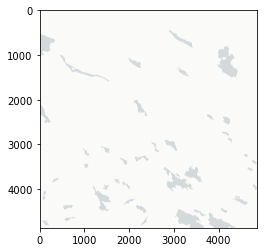

In [17]:
plt.imshow(X)